# Tensorflow Regression Model - Fuel Efficiency Prediction  

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Numpy output easier to read
np.set_printoptions(precision=3, suppress=True)

In [2]:
# Tensorflow Specific imports
import tensorflow as tf
print('Tensorflow Version ', tf.__version__)

Tensorflow Version  2.4.1


### Load Data

In [3]:
col_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

rawdata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                      names=col_names,
                      sep=' ',
                      na_values='?', # The character '?' to be considered a missing value
                      skipinitialspace=True,
                      comment='\t'
                      )

In [4]:
rawdata.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
# Lets create a shallow copy of the dataset
data= rawdata.copy()

### Dat Preprocessing

#### Dataset Info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


💡  
. There are 398 rows  
. total 8 features  
. index starts from 0 to 397  
. Some features are of type 'int64' and some are of 'float64'  

#### Check for Duplicate Records

In [7]:
data[data.duplicated()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


💡  No duplicate records found.

#### Check for Missing Values

In [8]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

💡  6 Missing values in feature `Horsepower`


##### Missing Value Treatment

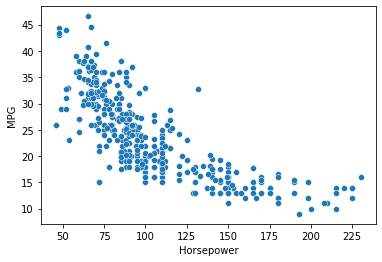

In [9]:
# scatterplot : MPG and Horsepower
sns.scatterplot(data=data, x='Horsepower', y='MPG')
plt.show()

💡  
. Linear relationship exist  
. Not much outliers present  
. Mean Imputation can be used to replace missing values.  

In [10]:
horsepower_mean = data.Horsepower.mean()
horsepower_mean

104.46938775510205

In [11]:
# Mean imputation
data.Horsepower.fillna(horsepower_mean, inplace=True)

In [12]:
# Lets confirm missing values
data.Horsepower.isnull().sum()

0

#### Data Statistics

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


💡 Features covers very different ranges

#### Pair Plot

<Figure size 720x720 with 0 Axes>

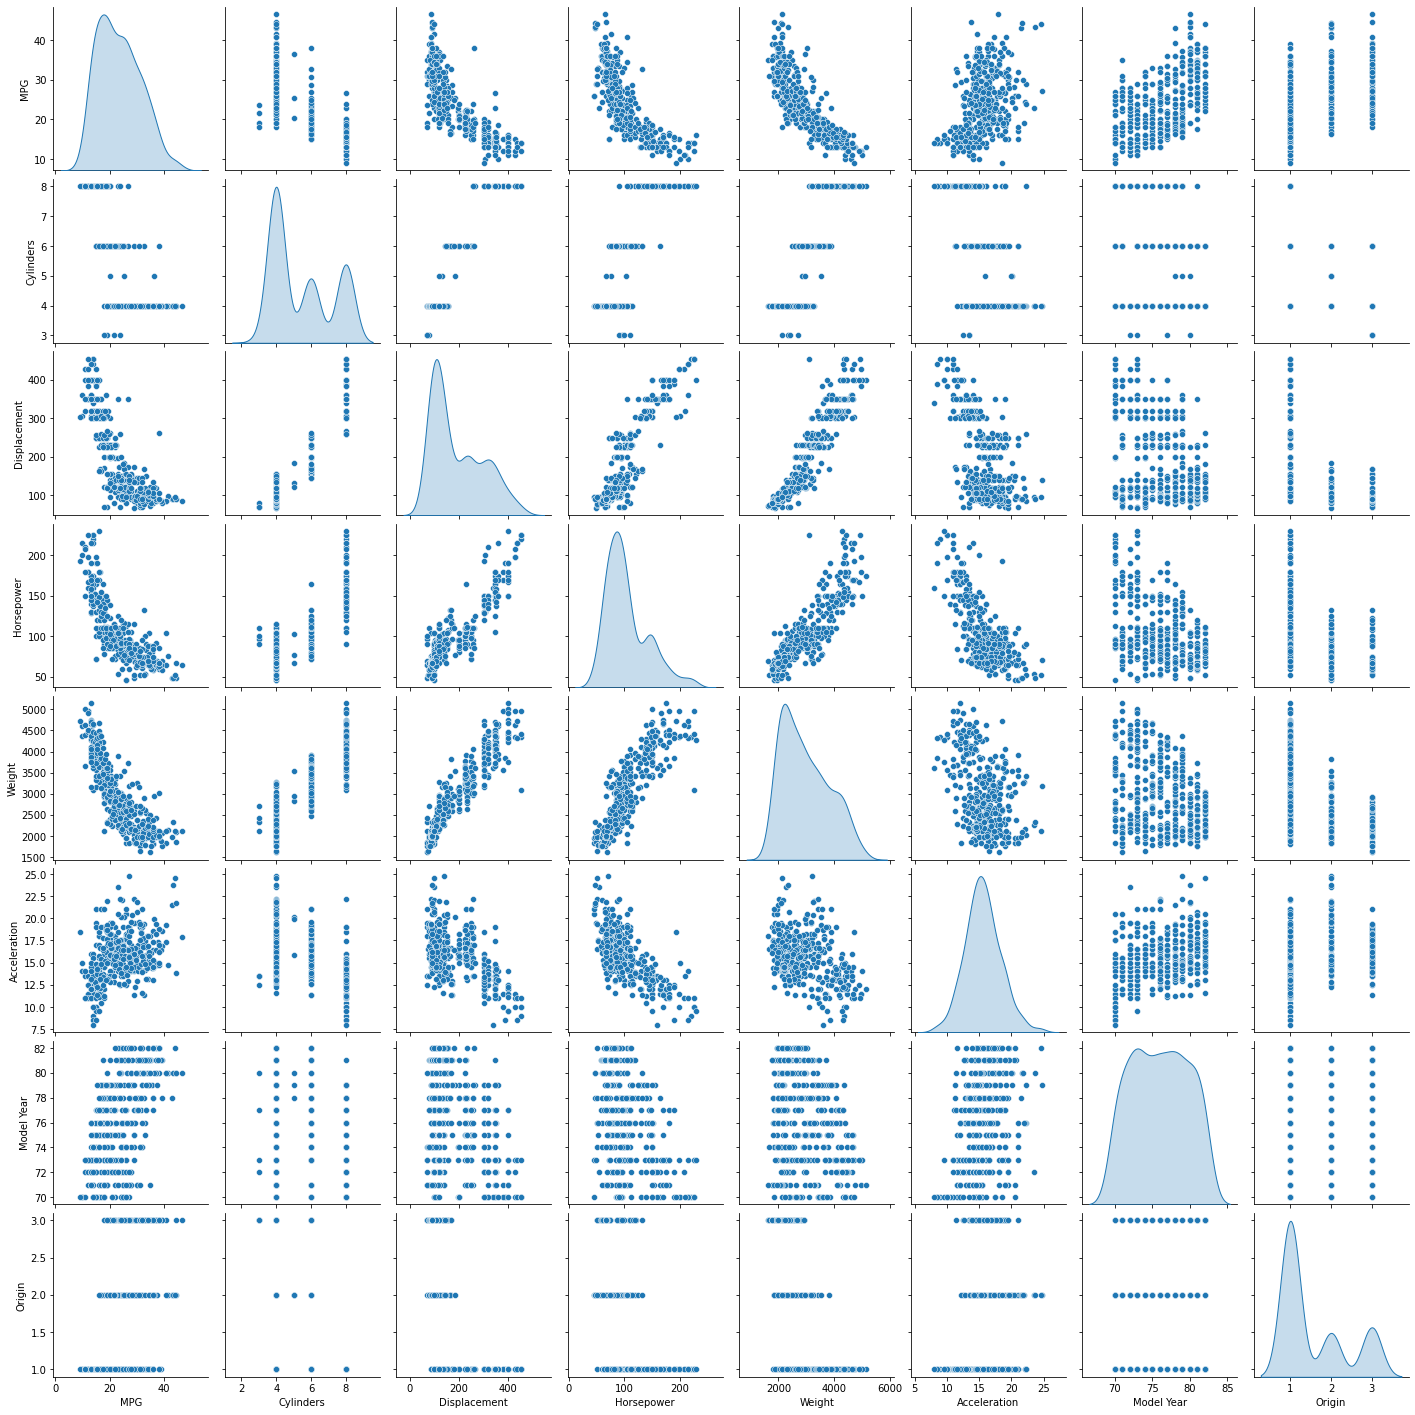

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(data=data, kind='scatter', diag_kind='kde')
plt.show()

💡  
. Clearly feature `Origin` has three distinct set of values.  
. Feature `MPG` has strong linear relationship with features `Displacement`, `Horsepower` and `Weight`.  
. Feature `Model Year` does not represents linear relation with other features.  
. Feature `Weight` has strong positive linear relationship with `Displacement` and `Horsepower`.  
. Feature `Acceleration` is normally distributed.

#### Colinearity Check

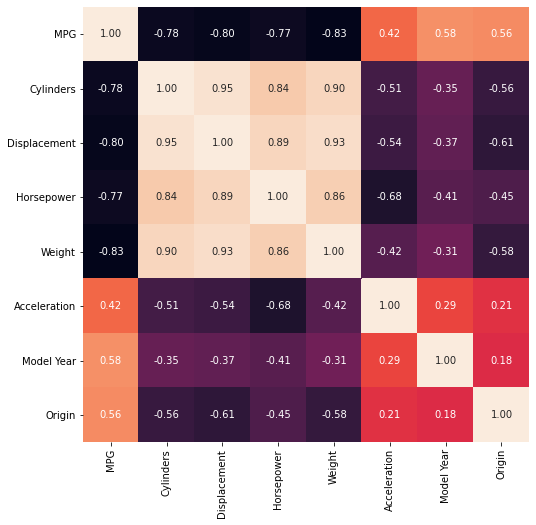

In [15]:
corr_matirx = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matirx, annot=True, fmt='.2f', cbar=False)
plt.show()

💡  
. features `Cylinders` and `Displacement` has strong positive correlation. (r=0.95).  
. One of the feature can be dropped.

##### Multicolinearity Treatment

💡 Either of `Cylinders` and `Displacement` can be dropped. Before selecting which to dropp lets look at stat of these features

In [16]:
data[['Cylinders', 'Displacement']].describe()

,Cylinders,Displacement
count,398.000000,398.000000
mean,5.454774,193.425879
std,1.701004,104.269838
min,3.000000,68.000000
25%,4.000000,104.250000
50%,4.000000,148.500000
75%,8.000000,262.000000
max,8.000000,455.000000


💡  
. Range of feature `Cylinders` is low. Min 3 , Max 8.   
. Numerical computation cost on feature `Displacement` would be higher.  
. `Displacement` can be drop off.

In [17]:
data.drop(['Displacement'], axis=1, inplace=True)
data.columns

Index(['MPG', 'Cylinders', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Origin'],
      dtype='object')

In [18]:
print('Number of unique values in Cyliders ', data.Cylinders.nunique())
print('Unique Cyliders values are ', data.Cylinders.unique())

Number of unique values in Cyliders  5
Unique Cyliders values are  [8 4 6 3 5]


#### Dealing Categorical Feature

💡 From the pair plot we saw feature `Origin` has 3 values. Lets inspect the feature

In [19]:
print('Number of unique values in Origin ', data.Origin.nunique())
print('Unique Cyliders values Origin ', data.Origin.unique())

Number of unique values in Origin  3
Unique Cyliders values Origin  [1 3 2]


💡 `Origin` in the dataset represets manufacturing regions of cars. We are not sure about which region but it can be any.  

We can not send `Origin` as it is to our model then model will treat it as a normal numerical feature.  

Lets first convert the feature to categories and then we can encode the categories.

In [20]:
data['Origin'] = data.Origin.map({
    1: 'USA',
    2: 'Europe',
    3: 'Asia'
})

data.Origin.unique()

array(['USA', 'Asia', 'Europe'], dtype=object)

In [21]:
# One Hot Ecoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_origin = encoder.fit_transform(data.Origin.values.reshape(-1,1)).toarray()
encoder.categories_
encoder.get_feature_names()

array(['x0_Asia', 'x0_Europe', 'x0_USA'], dtype=object)

In [22]:
encoded_origin[[19]]

array([[0., 1., 0.]])

In [23]:
encoded_origin_df = pd.DataFrame(encoded_origin, columns=encoder.get_feature_names())
encoded_origin_df.head()

,x0_Asia,x0_Europe,x0_USA
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [24]:
# Lets merge the encoded array with our dataset
data = pd.concat([data,encoded_origin_df], axis=1)
data.head()

,MPG,Cylinders,Horsepower,Weight,Acceleration,Model Year,Origin,x0_Asia,x0_Europe,x0_USA
0,18.0,8,130.0,3504.0,12.0,70,USA,0.0,0.0,1.0
1,15.0,8,165.0,3693.0,11.5,70,USA,0.0,0.0,1.0
2,18.0,8,150.0,3436.0,11.0,70,USA,0.0,0.0,1.0
3,16.0,8,150.0,3433.0,12.0,70,USA,0.0,0.0,1.0
4,17.0,8,140.0,3449.0,10.5,70,USA,0.0,0.0,1.0


In [25]:
# Drop 'Origin'
data.drop('Origin', axis=1, inplace=True)
data.head(2)

,MPG,Cylinders,Horsepower,Weight,Acceleration,Model Year,x0_Asia,x0_Europe,x0_USA
0,18.0,8,130.0,3504.0,12.0,70,0.0,0.0,1.0
1,15.0,8,165.0,3693.0,11.5,70,0.0,0.0,1.0


#### Normalizing Features  
💡
As we saw in the feature stat table , features are not in same scale.  
It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.   

Lets first split the dataset into training and testing datasets.

### Features and Target Split

In [26]:
data.columns

Index(['MPG', 'Cylinders', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'x0_Asia', 'x0_Europe', 'x0_USA'],
      dtype='object')

In [27]:
features = data.drop('MPG', axis=1)
target = data.pop('MPG')

In [28]:
features

,Cylinders,Horsepower,Weight,Acceleration,Model Year,x0_Asia,x0_Europe,x0_USA
0,8,130.0,3504.0,12.0,70,0.0,0.0,1.0
1,8,165.0,3693.0,11.5,70,0.0,0.0,1.0
2,8,150.0,3436.0,11.0,70,0.0,0.0,1.0
3,8,150.0,3433.0,12.0,70,0.0,0.0,1.0
4,8,140.0,3449.0,10.5,70,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
393,4,86.0,2790.0,15.6,82,0.0,0.0,1.0
394,4,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,4,84.0,2295.0,11.6,82,0.0,0.0,1.0
396,4,79.0,2625.0,18.6,82,0.0,0.0,1.0


In [29]:
target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64

In [30]:
print('Features Shape ', features.shape)
print('Target Shape ', target.shape)

Features Shape  (398, 8)
Target Shape  (398,)


### Dataset Split  
💡
We will keep 80% data samples for training data and rest 20% for testing data.


In [31]:
from sklearn.model_selection import train_test_split
feats_train,feats_test, target_train, target_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)
print('Features - Train Shape ', feats_train.shape)
print('Features - Test Shape ', feats_test.shape)
print('Target - Train Shape ', target_train.shape)
print('Target - Test Shape ', target_test.shape)

Features - Train Shape  (318, 8)
Features - Test Shape  (80, 8)
Target - Train Shape  (318,)
Target - Test Shape  (80,)


### Normalization  
💡
Now training and testing datasets are ready , also features and target variables are seperated out, we will perform follwing normalizations  

1. Normalize only feature `Horsepower` which to be used in case of Single variable regression model,  

2. Normalize all input features , which to be used in case of Multiple variable regression model.

In [85]:
# Normalizing `Horsepower`

hp_normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
hp_normalizer.adapt(feats_train['Horsepower'].values) 

# Horspower Normalizer is ready

# Lets check what normalier stored
print('Mean of feature Horspower ',hp_normalizer.mean.numpy())
print('Variance of feature Horsepower',  hp_normalizer.variance.numpy())

# Lets check what is normalized value of a sample Horsepower '130'.
print('Normalized Value of Horsepower 130 = ', hp_normalizer(130).numpy())

Mean of feature Horspower  [103.303]
Variance of feature Horsepower [1369.536]
Normalized Value of Horsepower 130 =  [[0.721]]


💡 So our normalizer `hp_normalizer` is ready to be used in Simple Linear Regression Model.

In [33]:
# Lets keep another normalizer ready to normalize all features

normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(feats_train))

# Lets check what normalier stored
print('Mean of all features ',normalizer.mean.numpy())
print('Variance of all features',  normalizer.variance.numpy())

# Lets check what is normalized value of a sample (first row in features).
print('Normalized Value of Horsepower 130 = ', normalizer(feats_train.values[0:1]))

Mean of all features  [   5.431  103.303 2969.016   15.64    76.104    0.208    0.176    0.616]
Variance of all features [     2.83    1369.536 704416.06       7.612     12.942      0.164
      0.145      0.236]
Normalized Value of Horsepower 130 =  tf.Tensor([[ 1.527  1.262  0.553 -1.319 -1.697 -0.512 -0.462  0.789]], shape=(1, 8), dtype=float32)


💡 So our `normalizer` is ready to be used in Multiple Linear Regression Models.

### ModelS  

We will build following variants of models using `tensorflow.keras` api, 

1. Linear Regression Model
    - Simple Regression Model (One Feature and One Target Variable)  
    - Multiple Regression Model (Multiple Features and One Target Variable)

2. Deep Neural Network (DNN) Model
    - Simple Regression Model (One Feature and One Target Variable)  
    - Multiple Regression Model (Multiple Features and One Target Variable)

#### Linear Regression Model  

 ##### Simple Linear Regression Model  

We will predict `MPG` given input `Horsepower`. 

We will build Sequential model with below two layers

Model Architecture:  
  - Normalization Layer (includes normalized feature `Horsepower`
  - Dense Layer (Maps input to output using a linear transformation `Y = MX + C`

###### Build Model

In [86]:
# import libraries
from tensorflow import keras
from keras import layers

model_A = keras.Sequential()
model_A.add(hp_normalizer)
model_A.add(layers.Dense(units=1))

model_A.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


###### Train Model

In [88]:
model_A.compile(
    loss = 'mean_absolute_error',
    optimizer= tf.optimizers.Adam(learning_rate=0.1)
)


model_A_history = model_A.fit(
    x=feats_train['Horsepower'],
    y=target_train,
    epochs=100,
    validation_split=0.20,
    verbose=1
)

Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 23.5510 - val_loss: 22.9043
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.5001 - val_loss: 22.1053
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 21.4835 - val_loss: 21.3091
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 21.2064 - val_loss: 20.5088
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.7977 - val_loss: 19.7083
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 20.1857 - val_loss: 18.9052
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 18.7818 - val_loss: 18.1068
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 17.5421 - val_loss: 17.3098
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 17.2464 - val_loss: 16.5097
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 16.2488 - val_loss: 15.7123
Epoch 11

###### Inspect Model Training History

In [89]:
model_A_history_df = pd.DataFrame(model_A_history.history)
model_A_history_df

,loss,val_loss
0,23.241434,22.904301
1,22.438465,22.105278
2,21.642273,21.309065
3,20.837540,20.508751
4,20.037773,19.708338
...,...,...
95,3.919667,3.913853
96,3.918925,3.911275
97,3.919845,3.913051
98,3.918387,3.911753


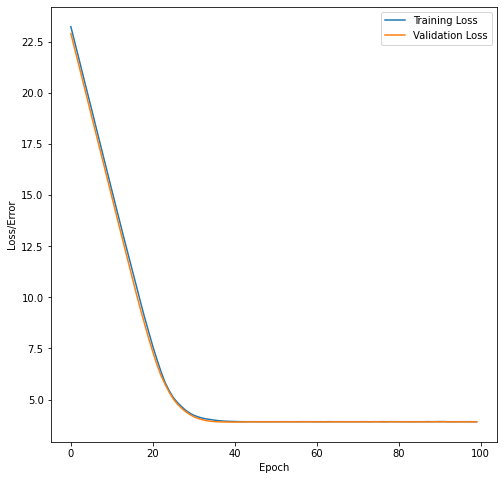

In [90]:
# Plot Model History Data
plt.figure(figsize=(8,8))
plt.plot(model_A_history.history['loss'], label='Training Loss')
plt.plot(model_A_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

###### Test Model

In [91]:
model_A_pred = model_A.predict(feats_test['Horsepower'])
model_A_pred

array([[31.939],
       [27.522],
       [23.954],
       [15.46 ],
       [15.46 ],
       [25.993],
       [25.314],
       [ 4.417],
       [22.256],
       [23.195],
       [ 8.665],
       [29.561],
       [29.051],
       [15.46 ],
       [28.202],
       [10.363],
       [26.503],
       [19.707],
       [10.363],
       [29.391],
       [28.032],
       [24.804],
       [21.916],
       [26.842],
       [18.858],
       [32.109],
       [25.653],
       [25.993],
       [20.557],
       [12.572],
       [26.333],
       [28.371],
       [19.707],
       [24.804],
       [29.9  ],
       [ 1.869],
       [22.765],
       [16.31 ],
       [15.46 ],
       [26.842],
       [21.406],
       [30.75 ],
       [21.916],
       [ 4.417],
       [24.464],
       [25.993],
       [28.202],
       [21.406],
       [24.804],
       [28.881],
       [28.711],
       [29.9  ],
       [28.711],
       [ 8.665],
       [22.256],
       [11.213],
       [15.46 ],
       [25.653],
       [25.653

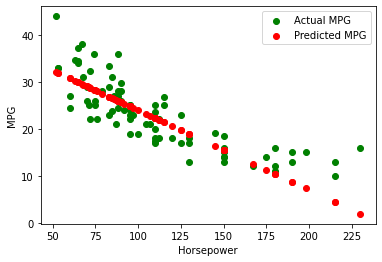

In [94]:
plt.scatter(x=feats_test['Horsepower'], y=target_test,color='g', label='Actual MPG')
plt.scatter(x=feats_test['Horsepower'], y=model_A_pred, color='r', label='Predicted MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

##### Multiple Regression Model 

We will predict `MPG` given all features in the preprocessed dataset.  

We will build a Sequential model.

Model Architecture:

Normalization Layer (includes all normalized features)
Dense Layer (Maps input to output using a linear transformation Y = MX + C , here M is a matrix of shape (318,8) and C is a vector)

In [95]:
model_B = keras.Sequential(
    [normalizer,
     layers.Dense(units=1)
     ]
)

model_B.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [105]:
feats_train.values

array([[   8.,  150., 3433., ...,    0.,    0.,    1.],
       [   4.,   88., 2130., ...,    1.,    0.,    0.],
       [   4.,   68., 2025., ...,    1.,    0.,    0.],
       ...,
       [   4.,   95., 2515., ...,    1.,    0.,    0.],
       [   4.,   62., 2050., ...,    1.,    0.,    0.],
       [   4.,   46., 1950., ...,    0.,    1.,    0.]])

In [112]:
model_B.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(learning_rate=0.1))
model_B_history = model_B.fit(
    x=feats_train,
    y=target_train,
    epochs=100,
    validation_split=0.20
)

Epoch 1/100
8/8 [==============================] - 0s 27ms/step - loss: 7.3468 - val_loss: 7.3783
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 6.7611 - val_loss: 6.5089
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 6.2106 - val_loss: 5.7328
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 5.2839 - val_loss: 5.1300
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 5.1818 - val_loss: 4.5540
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 4.2180 - val_loss: 3.9850
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 3.5976 - val_loss: 3.5230
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 3.1478 - val_loss: 3.2438
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 2.9425 - val_loss: 3.1777
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 2.6990 - val_loss: 2.9749
Epoch 11/100
8/8 [==========

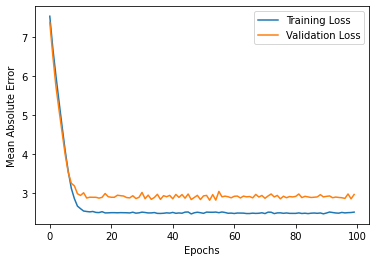

In [113]:
plt.plot(model_B_history.history['loss'], label='Training Loss')
plt.plot(model_B_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [131]:
df = pd.DataFrame()
#df['A']=np.array(model_B_prediction)
model_B_prediction.flatten()

array([31.943, 27.841, 21.276, 17.401, 13.723, 27.884, 26.883, 11.589,
       16.61 , 21.388, 14.658, 35.252, 24.008, 15.171, 23.339,  9.071,
       28.437, 24.384, 16.865, 34.865, 23.412, 19.237, 27.078, 27.885,
       15.992, 30.952, 25.699, 24.371, 21.416, 10.48 , 27.389, 33.031,
       18.964, 27.086, 33.483, 14.202, 23.28 , 21.402, 13.64 , 26.447,
       26.103, 26.191, 21.677,  9.87 , 26.024, 34.295, 26.652, 25.13 ,
       22.908, 27.071, 21.832, 33.236, 31.974, 12.383, 27.303, 11.655,
       19.364, 29.967, 23.076, 20.124, 17.225, 31.284, 23.474, 20.742,
       20.729, 26.912, 24.189, 30.581, 25.911, 13.878, 29.866, 14.124,
       11.866, 19.48 , 26.263, 21.398, 20.012, 27.808, 28.923, 19.557],
      dtype=float32)

In [132]:
model_B_prediction = model_B.predict(feats_test)
model_B_prediction_Df = pd.DataFrame({
    'Actual MPG' : target_test,
    'Predicted MPG' : model_B_prediction.flatten()
})
model_B_prediction_Df.head()

,Actual MPG,Predicted MPG
198,33.0,31.943134
396,28.0,27.840797
33,19.0,21.275692
208,13.0,17.401417
93,14.0,13.723089


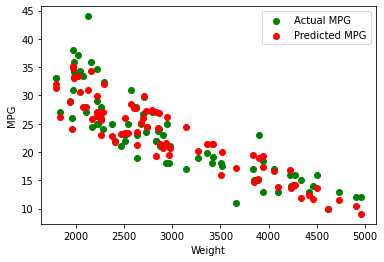

In [136]:
plt.scatter(x=feats_test['Weight'], y=target_test, color='g', label='Actual MPG')
plt.scatter(x=feats_test['Weight'], y=model_B_prediction, color='r', label='Predicted MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()

#### Deep Neural Network (DNN) Model

##### DNN - Simple Regression Model  

We will predict `MPG` given `Horsepower`.

##### DNN - Multiple Regression Model  

We will predict `MPG` given `Horsepower`.